In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [14]:
grf_walking=pd.read_csv('GRF/GRF_walking.csv')
grf_backpack=pd.read_csv('GRF/GRF_backpack_trial.csv')
grf_sidepack=pd.read_csv('GRF/GRF_sidepack_trial.csv')

# Percentage Stance Time 

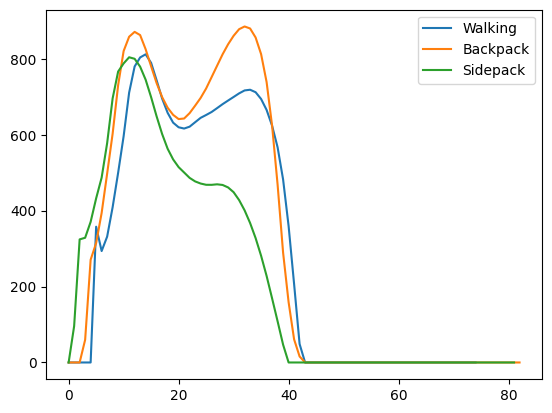

In [15]:
plt.plot(grf_walking['L.FZ'],label='Walking')
plt.plot(grf_backpack['L.FZ'],label='Backpack')
plt.plot(grf_sidepack['L.FZ'],label='Sidepack')
plt.legend()
plt.show()

In [16]:
time_walking=grf_walking['Frame#']
time_backpack=grf_backpack['Frame#']
time_sidepack=grf_sidepack['Frame#']

threshold=20
contact_walking=grf_walking['L.FZ']>threshold
hs_walking=np.where(np.diff(contact_walking.astype(int))==1)[0]
toff_walking=np.where(np.diff(contact_walking.astype(int))==-1)[0]

contact_backpack=grf_backpack['L.FZ']>threshold
hs_backpack=np.where(np.diff(contact_backpack.astype(int))==1)[0]
toff_backpack=np.where(np.diff(contact_backpack.astype(int))==-1)[0]

contact_sidepack=grf_sidepack['L.FZ']>threshold
hs_sidepack=np.where(np.diff(contact_sidepack.astype(int))==1)[0]
toff_sidepack=np.where(np.diff(contact_sidepack.astype(int))==-1)[0]

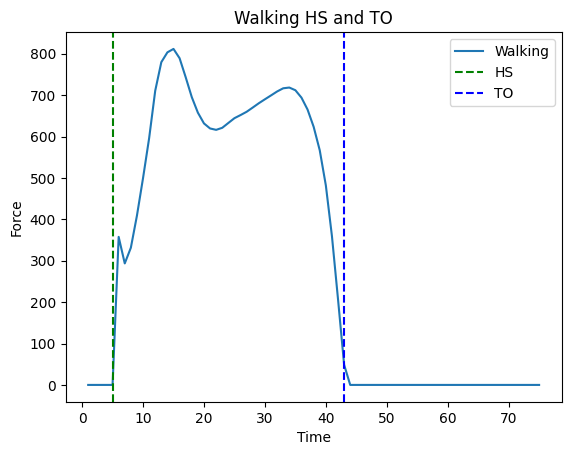

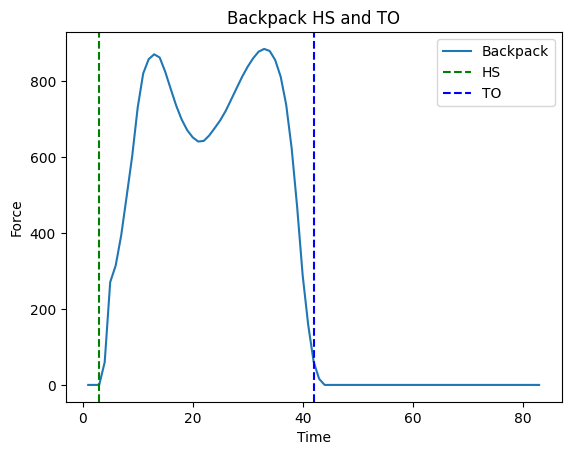

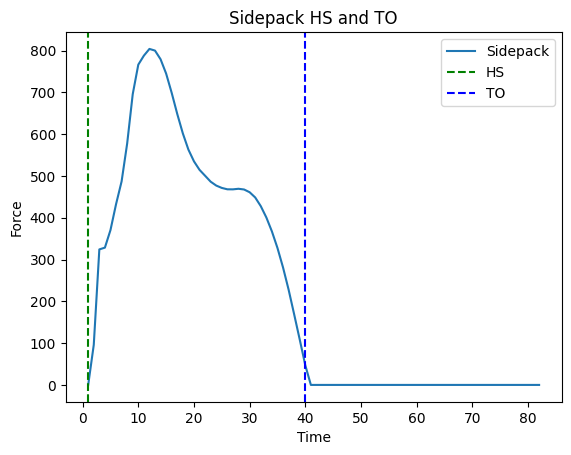

In [17]:
plt.plot(time_walking,grf_walking['L.FZ'],label='Walking')
#plt.axhline(threshold,color='r',linestyle='--',label='Threshold')
for hs in hs_walking:
    plt.axvline(time_walking[hs],color='g',linestyle='--',label='HS')
for toff in toff_walking:
    plt.axvline(time_walking[toff],color='b',linestyle='--',label='TO')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Force')
plt.title('Walking HS and TO')
plt.show()

plt.plot(time_backpack,grf_backpack['L.FZ'],label='Backpack')
#plt.axhline(threshold,color='r',linestyle='--',label='Threshold')
for hs in hs_backpack:
    plt.axvline(time_backpack[hs],color='g',linestyle='--',label='HS')
for toff in toff_backpack:
    plt.axvline(time_backpack[toff],color='b',linestyle='--',label='TO')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Force')
plt.title('Backpack HS and TO')
plt.show()

plt.plot(time_sidepack,grf_sidepack['L.FZ'],label='Sidepack')
#plt.axhline(threshold,color='r',linestyle='--',label='Threshold')
for hs in hs_sidepack:
    plt.axvline(time_sidepack[hs],color='g',linestyle='--',label='HS')
for toff in toff_sidepack:
    plt.axvline(time_sidepack[toff],color='b',linestyle='--',label='TO')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Force')
plt.title('Sidepack HS and TO')
plt.show()



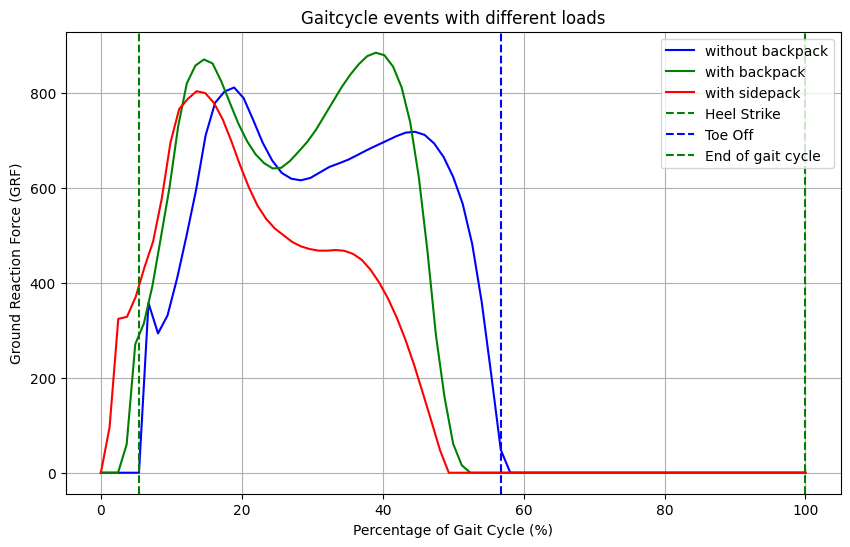

In [52]:

walking = grf_walking['L.FZ']
backpack = grf_backpack['L.FZ']
sidepack = grf_sidepack['L.FZ']

def normalize_by_time(cycle_data):
    return np.linspace(0, 100, len(cycle_data))

walking_normalized = normalize_by_time(walking)
backpack_normalized = normalize_by_time(backpack)
sidepack_normalized = normalize_by_time(sidepack)

plt.figure(figsize=(10, 6))
plt.plot(walking_normalized, walking, label="without backpack", color='b')
plt.plot(backpack_normalized, backpack, label="with backpack", color='g')
plt.plot(sidepack_normalized, sidepack, label="with sidepack", color='r')

plt.axvline(walking_normalized[hs_walking[0]], color='green', linestyle='--', label='Heel Strike')
plt.axvline(walking_normalized[toff_walking[0]], color='blue', linestyle='--', label='Toe Off ')
plt.axvline(100, color='green', linestyle='--', label='End of gait cycle')

# Add labels and title
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Ground Reaction Force (GRF)")
plt.title("Gaitcycle events with different loads")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [19]:
static=pd.read_csv('posture_data/data_walking_static.csv')
backpack_static=pd.read_csv('posture_data/data_backpack_static.csv')
sidepack_static=pd.read_csv('posture_data/data_sidepack_static.csv')
trial=pd.read_csv('posture_data/data_walking.csv')
backpack_trial=pd.read_csv('posture_data/data_backpack_trial.csv')
sidepack_trial=pd.read_csv('posture_data/data_sidepack_trial.csv')

In [20]:
trial_n=normalize_by_time(trial)
backpack_tn=normalize_by_time(backpack_trial)
sidepack_tn=normalize_by_time(sidepack_trial)

In [21]:
trial.loc[:,'Trunk_rx_deg']

0     154.65163
1     154.68702
2     154.68309
3     154.70467
4     154.68526
        ...    
70    154.92499
71    154.99668
72    154.91066
73    154.72698
74    154.65350
Name: Trunk_rx_deg, Length: 75, dtype: float64

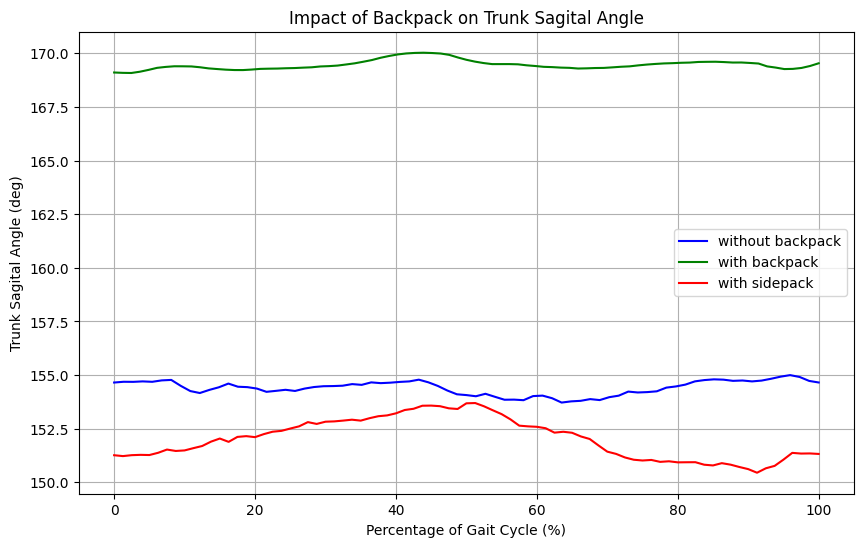

In [98]:

walking_t = trial['Trunk_rx_deg']
backpack_t = backpack_trial['Trunk_rx_deg']
sidepack_t = sidepack_trial['Trunk_rx_deg']

def normalize_by_time(cycle_data):
    return np.linspace(0, 100, len(cycle_data))

walking_t_normalized = normalize_by_time(walking_t)
backpack_t_normalized = normalize_by_time(backpack_t)
sidepack_t_normalized = normalize_by_time(sidepack_t)

plt.figure(figsize=(10, 6))
plt.plot(walking_t_normalized, walking_t, label="without backpack", color='b')
plt.plot(backpack_t_normalized, backpack_t, label="with backpack", color='g')
plt.plot(sidepack_t_normalized, sidepack_t, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Trunk Sagital Angle (deg)")
plt.title("Impact of Backpack on Trunk Sagital Angle")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [99]:

percentage_sway=(backpack_t-walking_t)/walking_t*100
percentage_sway_side=(sidepack_t-walking_t)/walking_t*100

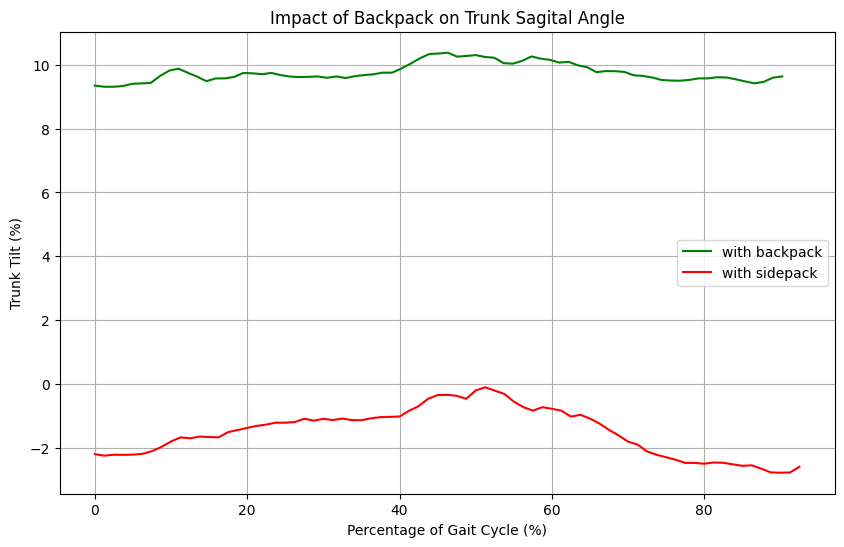

In [103]:
plt.figure(figsize=(10, 6))
sway_n=normalize_by_time(percentage_sway)
sways=normalize_by_time(percentage_sway_side)

plt.plot(sway_n, percentage_sway, label="with backpack", color='g')
plt.plot(sways, percentage_sway_side, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Trunk Tilt (%)")
plt.title("Impact of Backpack on Trunk Sagital Angle")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

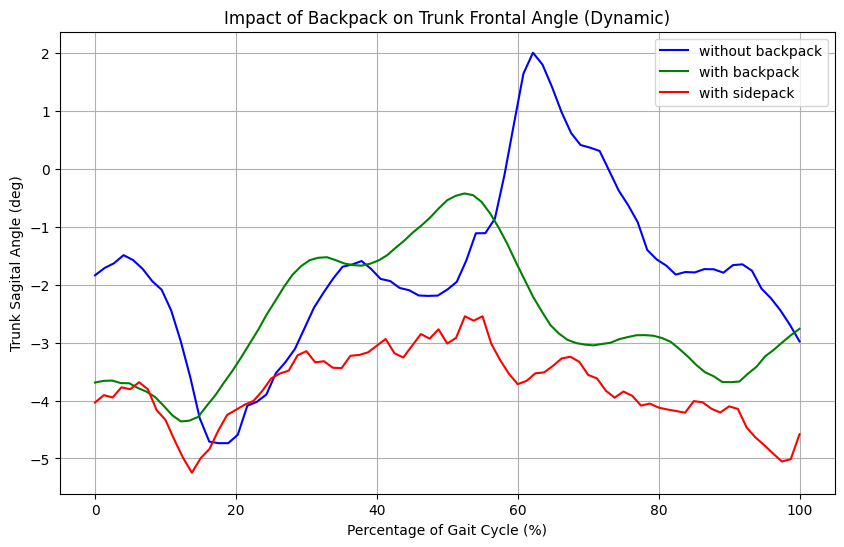

In [41]:

walking_t = trial['Trunk_ry_deg']
backpack_t = backpack_trial['Trunk_ry_deg']
sidepack_t = sidepack_trial['Trunk_ry_deg']

def normalize_by_time(cycle_data):
    return np.linspace(0, 100, len(cycle_data))

walking_t_normalized = normalize_by_time(walking_t)
backpack_t_normalized = normalize_by_time(backpack_t)
sidepack_t_normalized = normalize_by_time(sidepack_t)

plt.figure(figsize=(10, 6))
plt.plot(walking_t_normalized, walking_t, label="without backpack", color='b')
plt.plot(backpack_t_normalized, backpack_t, label="with backpack", color='g')
plt.plot(sidepack_t_normalized, sidepack_t, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Trunk Sagital Angle (deg)")
plt.title("Impact of Backpack on Trunk Frontal Angle (Dynamic)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [88]:
# COM calculation 
# anthropometric data 
m=75 # kg
h=1.75 # m
# pelvis mass
mass_of_pelvis=0.1117 # kg
# segment lengths
pelvis_comz=0.5
# radius of gyration 
pelvis_kx=0.615
pelvis_ky=0.551
pelvis_kz=0.587


# trunk 

trunk_comz=0.4166
trunk_kx=0.328
trunk_ky=0.306
trunk_kz=0.169

# normalize posture sway by hip width 
hip_width=0.191*h
comlthigh=0.433*trial['L.Thigh_l_mm']
comrthigh=0.433*trial['R.Thigh_l_mm']
compelvis=0.105*trial['Pelvis_l_mm']
comtrunk=0.5*trial['Trunk_l_mm']
mrthigh=0.1416
mlthigh=0.1416
mpelvis=0.1117
mass_of_trunk=0.3229
M=mrthigh+mlthigh+mpelvis+mass_of_trunk
combody=(mrthigh*comlthigh+mlthigh*comrthigh+mpelvis*compelvis+mass_of_trunk*comtrunk)/M
normalizedcom_trial=combody

comlthigh_backpack=0.433*backpack_trial['L.Thigh_l_mm']
comrthigh_backpack=0.433*backpack_trial['R.Thigh_l_mm']
compelvis_backpack=0.105*backpack_trial['Pelvis_l_mm']
comtrunk_backpack=0.5*backpack_trial['Trunk_l_mm']
combody_backpack=(mrthigh*comlthigh_backpack+mlthigh*comrthigh_backpack+mpelvis*compelvis_backpack+mass_of_trunk*comtrunk_backpack)/M
normalizedcom_backpack=combody_backpack[0:75]

comlthigh_sidepack=0.433*sidepack_trial['L.Thigh_l_mm'] 
comrthigh_sidepack=0.433*sidepack_trial['R.Thigh_l_mm']
compelvis_sidepack=0.105*sidepack_trial['Pelvis_l_mm']
comtrunk_sidepack=0.5*sidepack_trial['Trunk_l_mm']
combody_sidepack=(mrthigh*comlthigh_sidepack+mlthigh*comrthigh_sidepack+mpelvis*compelvis_sidepack+mass_of_trunk*comtrunk_sidepack)/M
normalizedcom_sidepack=combody_sidepack[0:75]








In [90]:
percentsway=(normalizedcom_backpack-combody)/combody*100
percentsway_sidepack=(normalizedcom_sidepack-combody)/combody*100

In [91]:
normalizedcom_trial_dynamic=normalize_by_time(normalizedcom_trial)
normalizedcom_backpack_dynamic=normalize_by_time(normalizedcom_backpack)
normalizedcom_sidepack_dynamic=normalize_by_time(normalizedcom_sidepack)


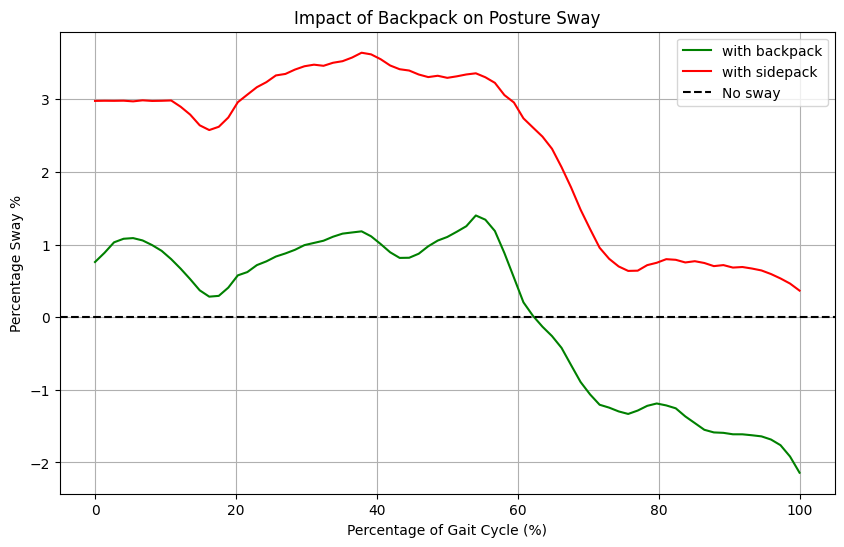

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(normalizedcom_backpack_dynamic,percentsway, label="with backpack", color='g')
plt.plot(normalizedcom_sidepack_dynamic,percentsway_sidepack, label="with sidepack", color='r')
plt.axhline(0, color='black', linestyle='--', label='No sway')
plt.legend()
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Percentage Sway %")
plt.title("Impact of Backpack on Posture Sway")
plt.grid(True)
plt.show()


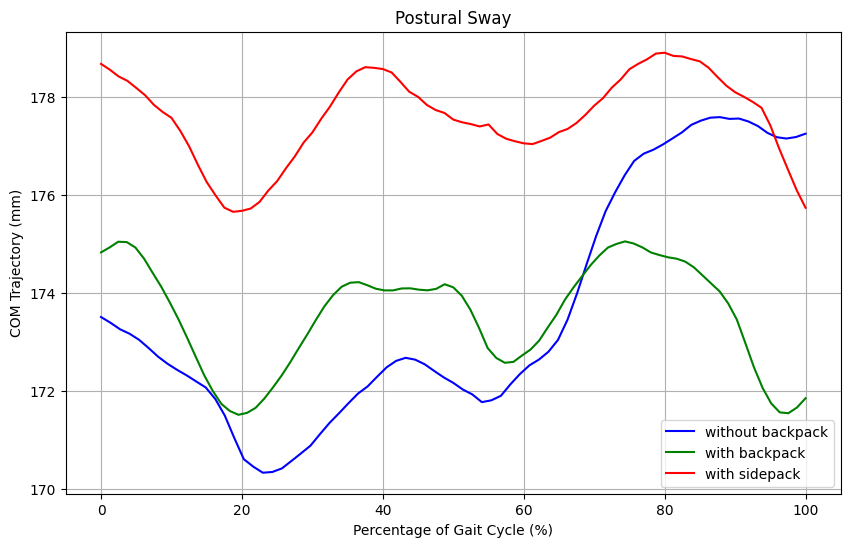

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(normalizedcom_trial_dynamic, normalizedcom_trial, label="without backpack", color='b')
plt.plot(normalizedcom_backpack_dynamic, normalizedcom_backpack, label="with backpack", color='g')
plt.plot(normalizedcom_sidepack_dynamic, normalizedcom_sidepack, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("COM Trajectory (mm)")
plt.title("Postural Sway")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [46]:
sampling_rate=60
def compute_velocity_of_com(center_of_mass_positions, sampling_rate):
   
    velocities = np.diff(center_of_mass_positions, axis=0) * sampling_rate
    return velocities

velocity_trial = compute_velocity_of_com(normalizedcom_trial, sampling_rate)
velocity_backpack = compute_velocity_of_com(normalizedcom_backpack, sampling_rate)
velocity_sidepack = compute_velocity_of_com(normalizedcom_sidepack, sampling_rate)

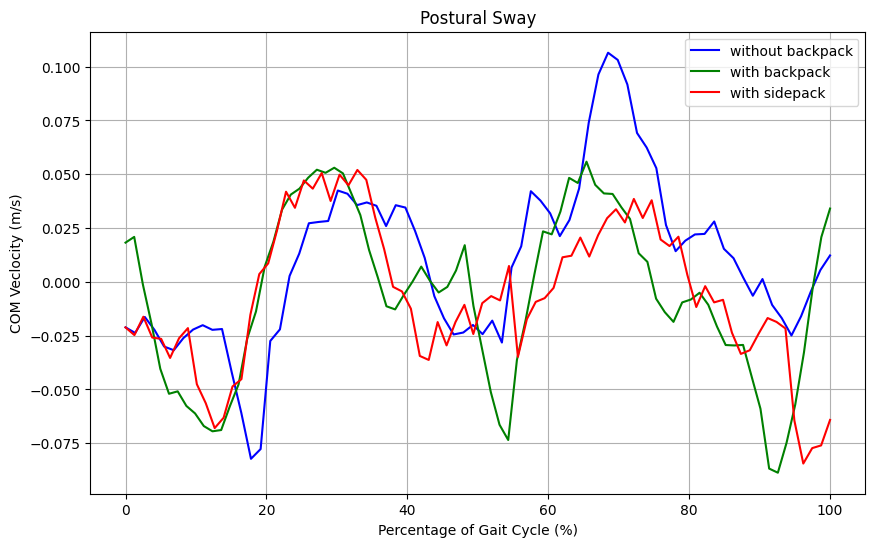

In [49]:
nvelcoity_trial=normalize_by_time(velocity_trial)
nvelocity_backpack=normalize_by_time(velocity_backpack)
nvelocity_sidepack=normalize_by_time(velocity_sidepack)
plt.figure(figsize=(10, 6))
plt.plot(nvelcoity_trial, velocity_trial/1000, label="without backpack", color='b')
plt.plot(nvelocity_backpack, velocity_backpack/1000, label="with backpack", color='g')
plt.plot(nvelocity_sidepack, velocity_sidepack/1000, label="with sidepack", color='r')

plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("COM Veclocity (m/s)")
plt.title("Postural Sway")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

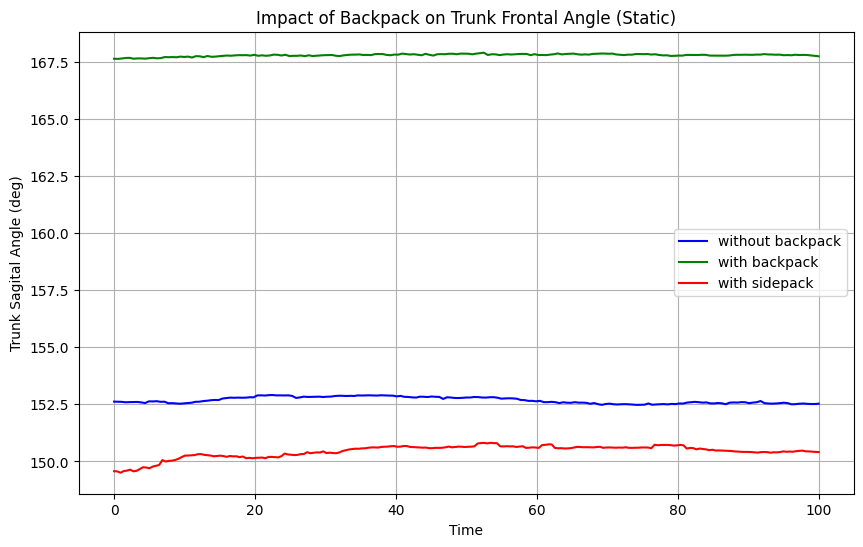

In [ ]:

static_t = static['Trunk_rx_deg']
sbackpack_t = backpack_static['Trunk_rx_deg']
ssidepack_t = sidepack_static['Trunk_rx_deg']

def normalize_by_time(cycle_data):
    return np.linspace(0, 100, len(cycle_data))

walking_t_normalized = normalize_by_time(static_t)
backpack_t_normalized = normalize_by_time(sbackpack_t)
sidepack_t_normalized = normalize_by_time(ssidepack_t)

plt.figure(figsize=(10, 6))
plt.plot(walking_t_normalized, static_t, label="without backpack", color='b')
plt.plot(backpack_t_normalized, sbackpack_t, label="with backpack", color='g')
plt.plot(sidepack_t_normalized, ssidepack_t, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Trunk Sagital Angle (deg)")
plt.title("Impact of Backpack on Trunk Frontal Angle (Static)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()